In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import LPR
#https://youtu.be/9dyaI3GyUtc?si=p2ld13VfrY6RH7pi

In [2]:
def plot_image(img, grayscale=True):
    plt.axis('off')
    if grayscale:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [3]:
idx = 1
lpr = LPR.LPR()

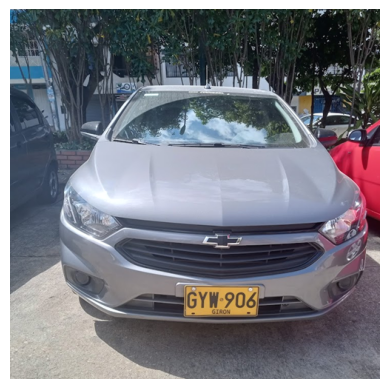

In [4]:
img = cv2.imread(f"./imgs/{idx:03}.png")
contraste = 1
brillo = 5
img = cv2.convertScaleAbs(img, alpha=contraste, beta=brillo)
plot_image(img, False)

In [12]:
contraste = 1.5
brillo = 30
imagen_contrastada = cv2.convertScaleAbs(img, alpha=contraste, beta=brillo)

# Filtro por colores (ejemplo: realce de amarillo)
amarillo_bajos = np.array([20, 100, 100], dtype=np.uint8)
amarillo_altos = np.array([30, 255, 255], dtype=np.uint8)
imagen_filtrada = cv2.inRange(cv2.cvtColor(imagen_contrastada, cv2.COLOR_BGR2HSV), amarillo_bajos, amarillo_altos)

# Detección de bordes
imagen_bordes = cv2.Canny(imagen_contrastada, 50, 150)

# Filtros de enfoque
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])
imagen_enfocada = cv2.filter2D(imagen_contrastada, -1, kernel)

# Mostrar las imágenes resultantes
cv2.imshow('Imagen Original', img)
cv2.imshow('Contraste y Brillo', imagen_contrastada)
cv2.imshow('Filtro por Colores', imagen_filtrada)
cv2.imshow('Detección de Bordes', imagen_bordes)
cv2.imshow('Filtros de Enfoque', imagen_enfocada)

# Esperar tecla para cerrar las ventanas
cv2.waitKey(0)
cv2.destroyAllWindows()

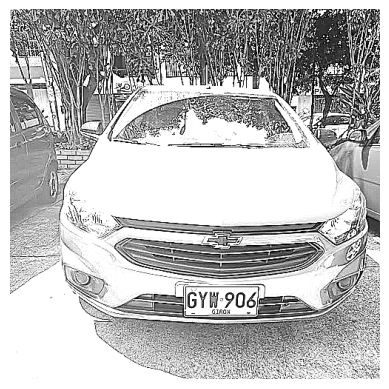

In [6]:
contraste = 1
brillo = 30

gray = lpr.grayscale(imagen_enfocada)
gray = cv2.convertScaleAbs(gray, alpha=contraste, beta=brillo)
plot_image(gray)

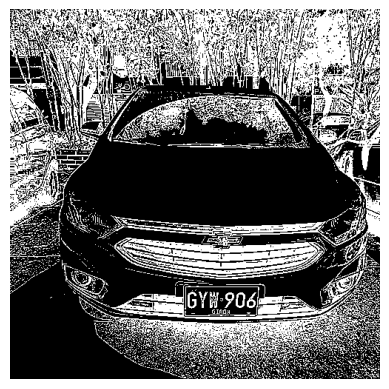

In [7]:
thresh = lpr.apply_threshold(gray)
plot_image(thresh)

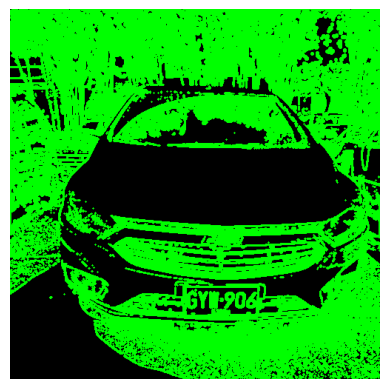

In [8]:
contours = lpr.find_contours(thresh)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , contours, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

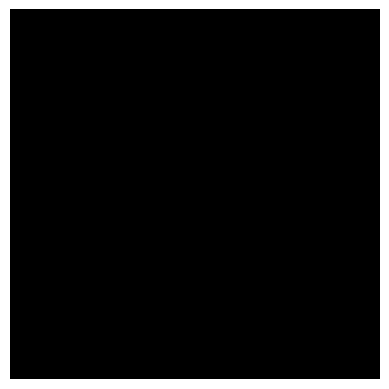

In [9]:
candidates = lpr.filter_candidates(contours)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , candidates, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

In [10]:
license = lpr.get_lowest_candidate(candidates)
canvas = np.zeros_like(img)
cv2.drawContours(canvas , [license], -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas);

ValueError: attempt to get argmax of an empty sequence

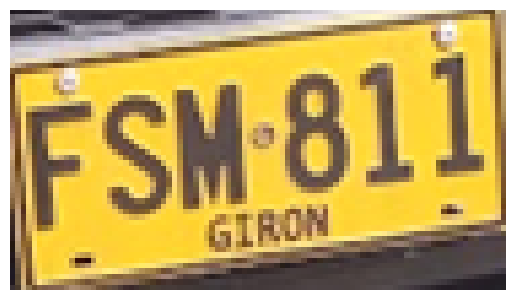

In [ ]:
cropped = lpr.crop_license_plate(gray, license)
cropped2 = lpr.crop_license_plate(img, license)
plot_image(cropped2, False)

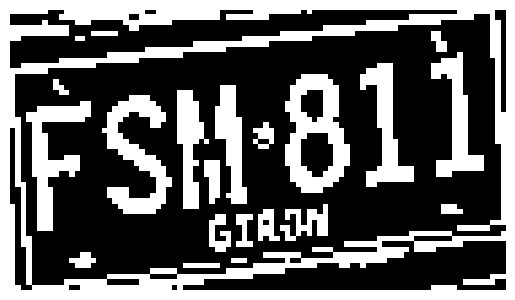

In [ ]:
thresh_cropped = lpr.apply_adaptive_threshold(cropped)
plot_image(thresh_cropped)

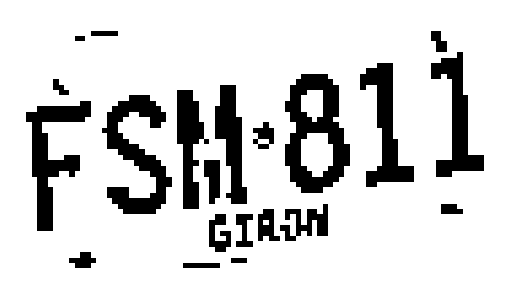

In [ ]:
clear_border = lpr.clear_border(thresh_cropped)
final = lpr.invert_image(clear_border)
plot_image(final)